In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar e preparar os dados
df = pd.read_csv('winequality-white.csv', sep=';')
df.drop('quality', axis=1, inplace=True)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Funções de utilidade
def normalize(df):
    return (df - df.mean()) / df.std()

def ols(X, y):
    X = np.c_[np.ones(X.shape[0]), X] 
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict(X, coeffs):
    X = np.c_[np.ones(X.shape[0]), X]
    return X @ coeffs

def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

def r_squared(y_true, y_pred):
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (ss_res/ss_tot)

In [10]:
# Corrigindo a função k_folds_evaluation
def k_folds_evaluation(df, k):
    folds = create_folds(df, k)
    rmses = []
    r2s = []
    
    for train_fold, test_fold in folds:
        
        X_train_fold = train_fold.drop('alcohol', axis=1)
        y_train_fold = train_fold['alcohol']
        coeffs = ols(X_train_fold, y_train_fold)
        
        X_test_fold = test_fold.drop('alcohol', axis=1)
        y_test_fold = test_fold['alcohol']
        y_pred_fold = predict(X_test_fold, coeffs)
        
        rmses.append(rmse(y_test_fold, y_pred_fold))
        r2s.append(r_squared(y_test_fold, y_pred_fold))
        
    return rmses, r2s

# Criando a função para criar folds
def create_folds(df, n_splits):
    folds = []
    indices = np.random.permutation(df.index)
    fold_size = len(df) // n_splits
    for i in range(n_splits):
        test_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)
        test_fold = df.loc[test_indices]
        train_fold = df.loc[train_indices]
        folds.append((train_fold, test_fold))
    return folds

In [11]:
# Normalizando os dados
df_normalized = normalize(df)

# Avaliando o modelo com 5 e 10 folds
rmse_5folds, r2_5folds = k_folds_evaluation(df_normalized, 5)
rmse_10folds, r2_10folds = k_folds_evaluation(df_normalized, 10)

5 Folds - RMSE médio: 0.3591, R² médio: 0.8603
10 Folds - RMSE médio: 0.3483, R² médio: 0.8647


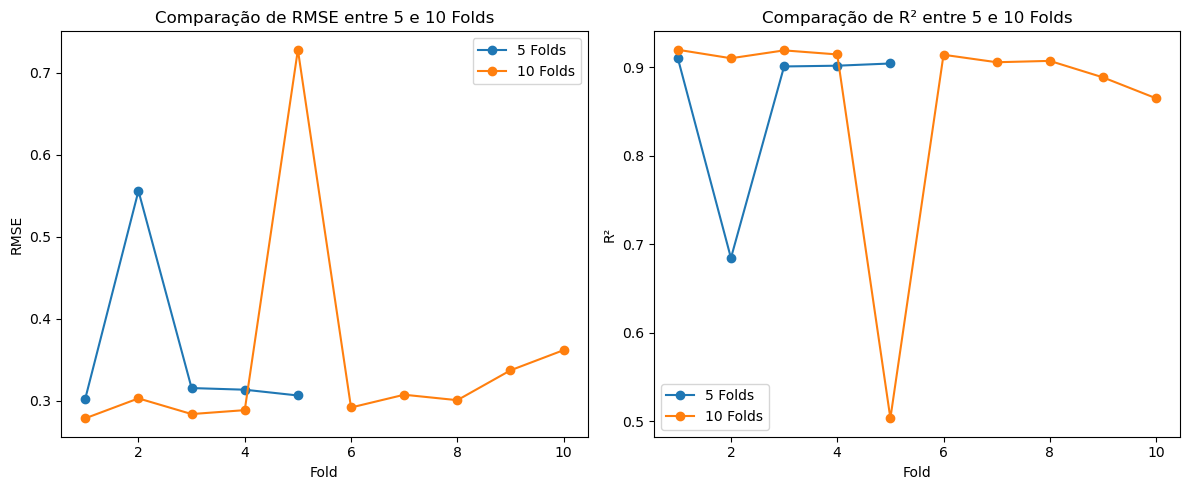

In [12]:
# Exibindo RMSE e R² médios
print(f"5 Folds - RMSE médio: {np.mean(rmse_5folds):.4f}, R² médio: {np.mean(r2_5folds):.4f}")
print(f"10 Folds - RMSE médio: {np.mean(rmse_10folds):.4f}, R² médio: {np.mean(r2_10folds):.4f}")

# Plotando RMSE e R²
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 6), rmse_5folds, marker='o', label='5 Folds')
plt.plot(range(1, 11), rmse_10folds, marker='o', label='10 Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Comparação de RMSE entre 5 e 10 Folds')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 6), r2_5folds, marker='o', label='5 Folds')
plt.plot(range(1, 11), r2_10folds, marker='o', label='10 Folds')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.title('Comparação de R² entre 5 e 10 Folds')
plt.legend()

plt.tight_layout()
plt.show()